# Cancer Disease Classification

Cancer refers to any one of a large number of diseases characterized by the development of abnormal cells that divide uncontrollably and have the ability to infiltrate and destroy normal body tissue. Cancer often has the ability to spread throughout your body.

Cancer is the second-leading cause of death in the world. But survival rates are improving for many types of cancer, thanks to improvements in cancer screening and cancer treatment.

In this project we will be classifying the patients whether they have cancer or not based on their medical reports using machine learning techniques.

In [1]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

import os
from subprocess import call
import pydot
from IPython.display import Image

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

C:\Users\rkbra\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("./datasets/cancer.csv")

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. radius (mean of distances from center to points on the perimeter)
4. texture (standard deviation of gray-scale values)
5. perimeter
6. area
7. smoothness (local variation in radius lengths)
8. compactness (perimeter^2 / area - 1.0)
9. concavity (severity of concave portions of the contour)
10. concave points (number of concave portions of the contour)
11. symmetry
12. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [6]:
df.drop('Unnamed: 32', 1, inplace=True)

In [7]:
df.isna().mean()

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

There are no missing values in the dataset as we can see.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### Correlation

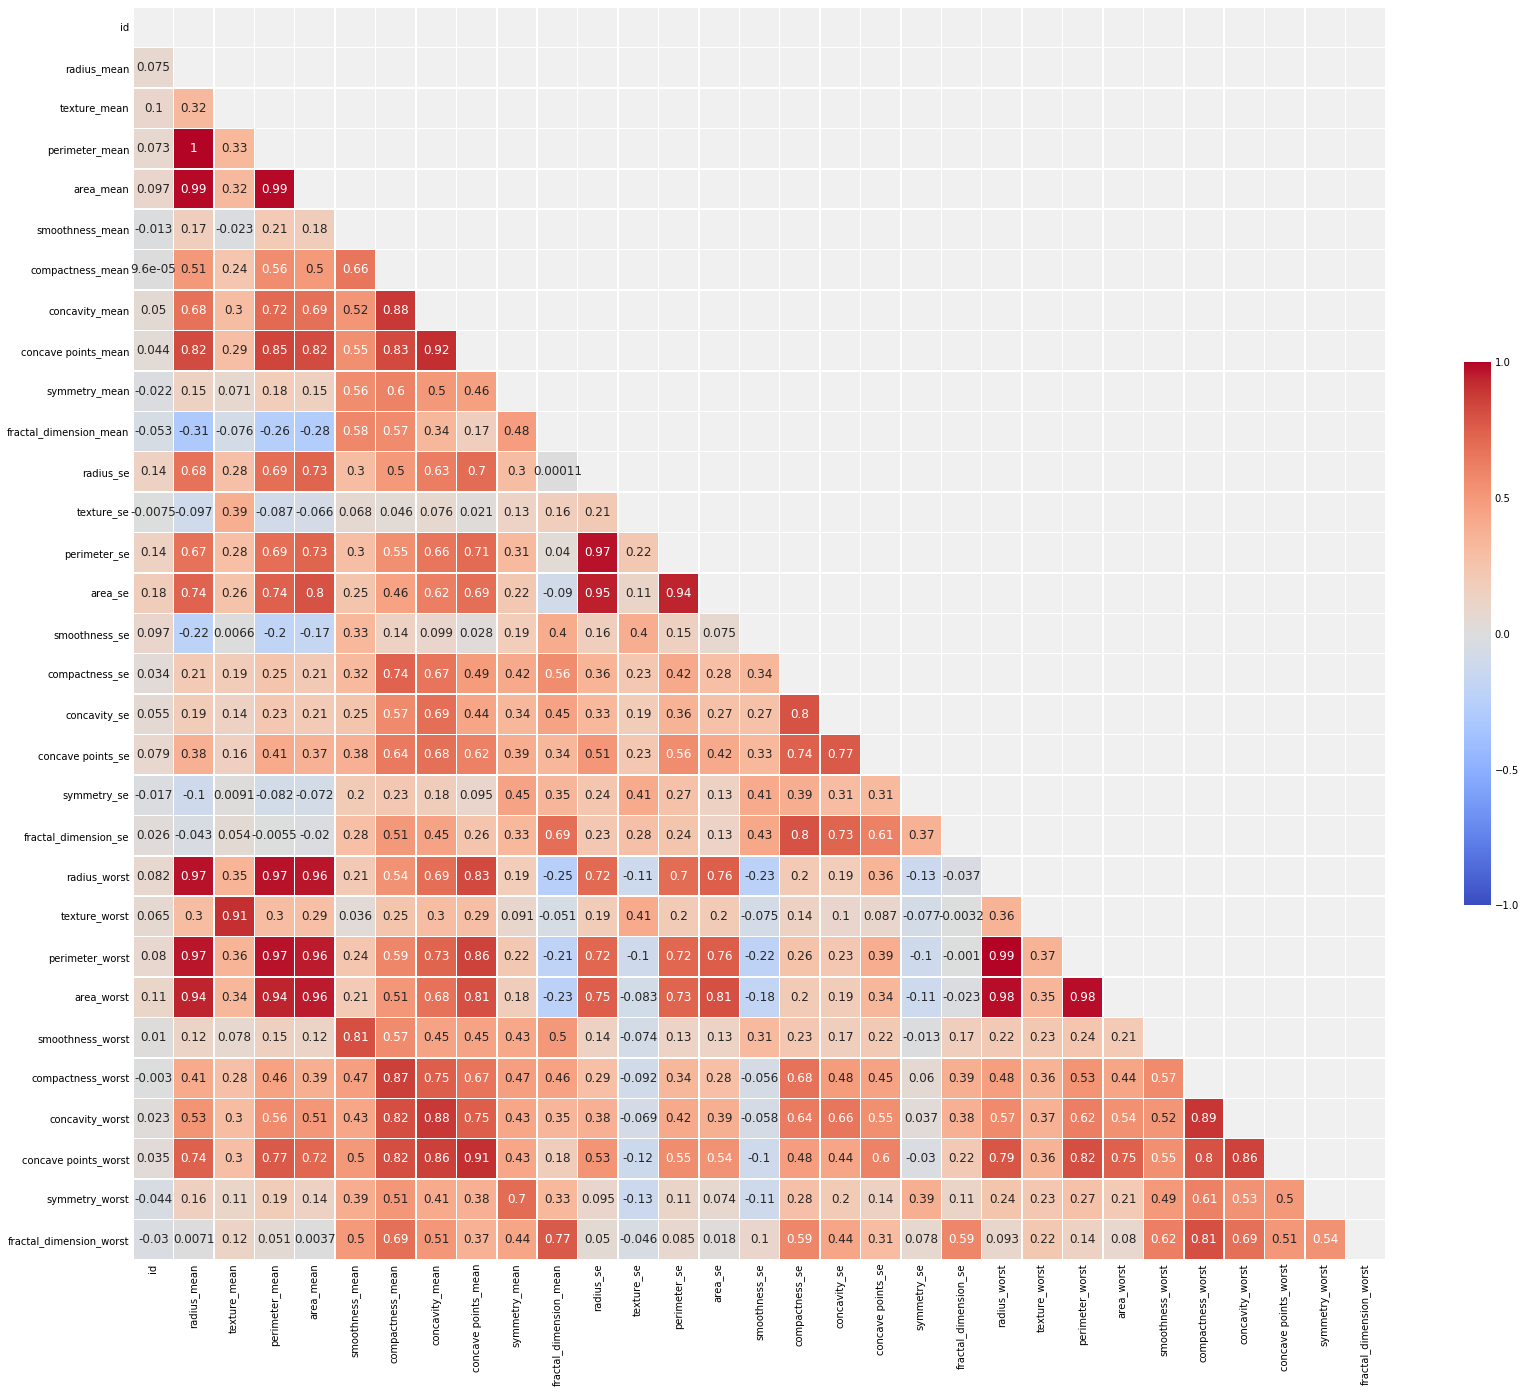

In [9]:
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(25, 25)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [10]:
corr_matrix

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


We can drop the columns containing area and perimeter, as from the radius these two features can be inherited

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df_drop = df.drop(['id','perimeter_mean','area_mean','perimeter_se','area_se','perimeter_worst','area_worst'], 1)

In [13]:
df_drop.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


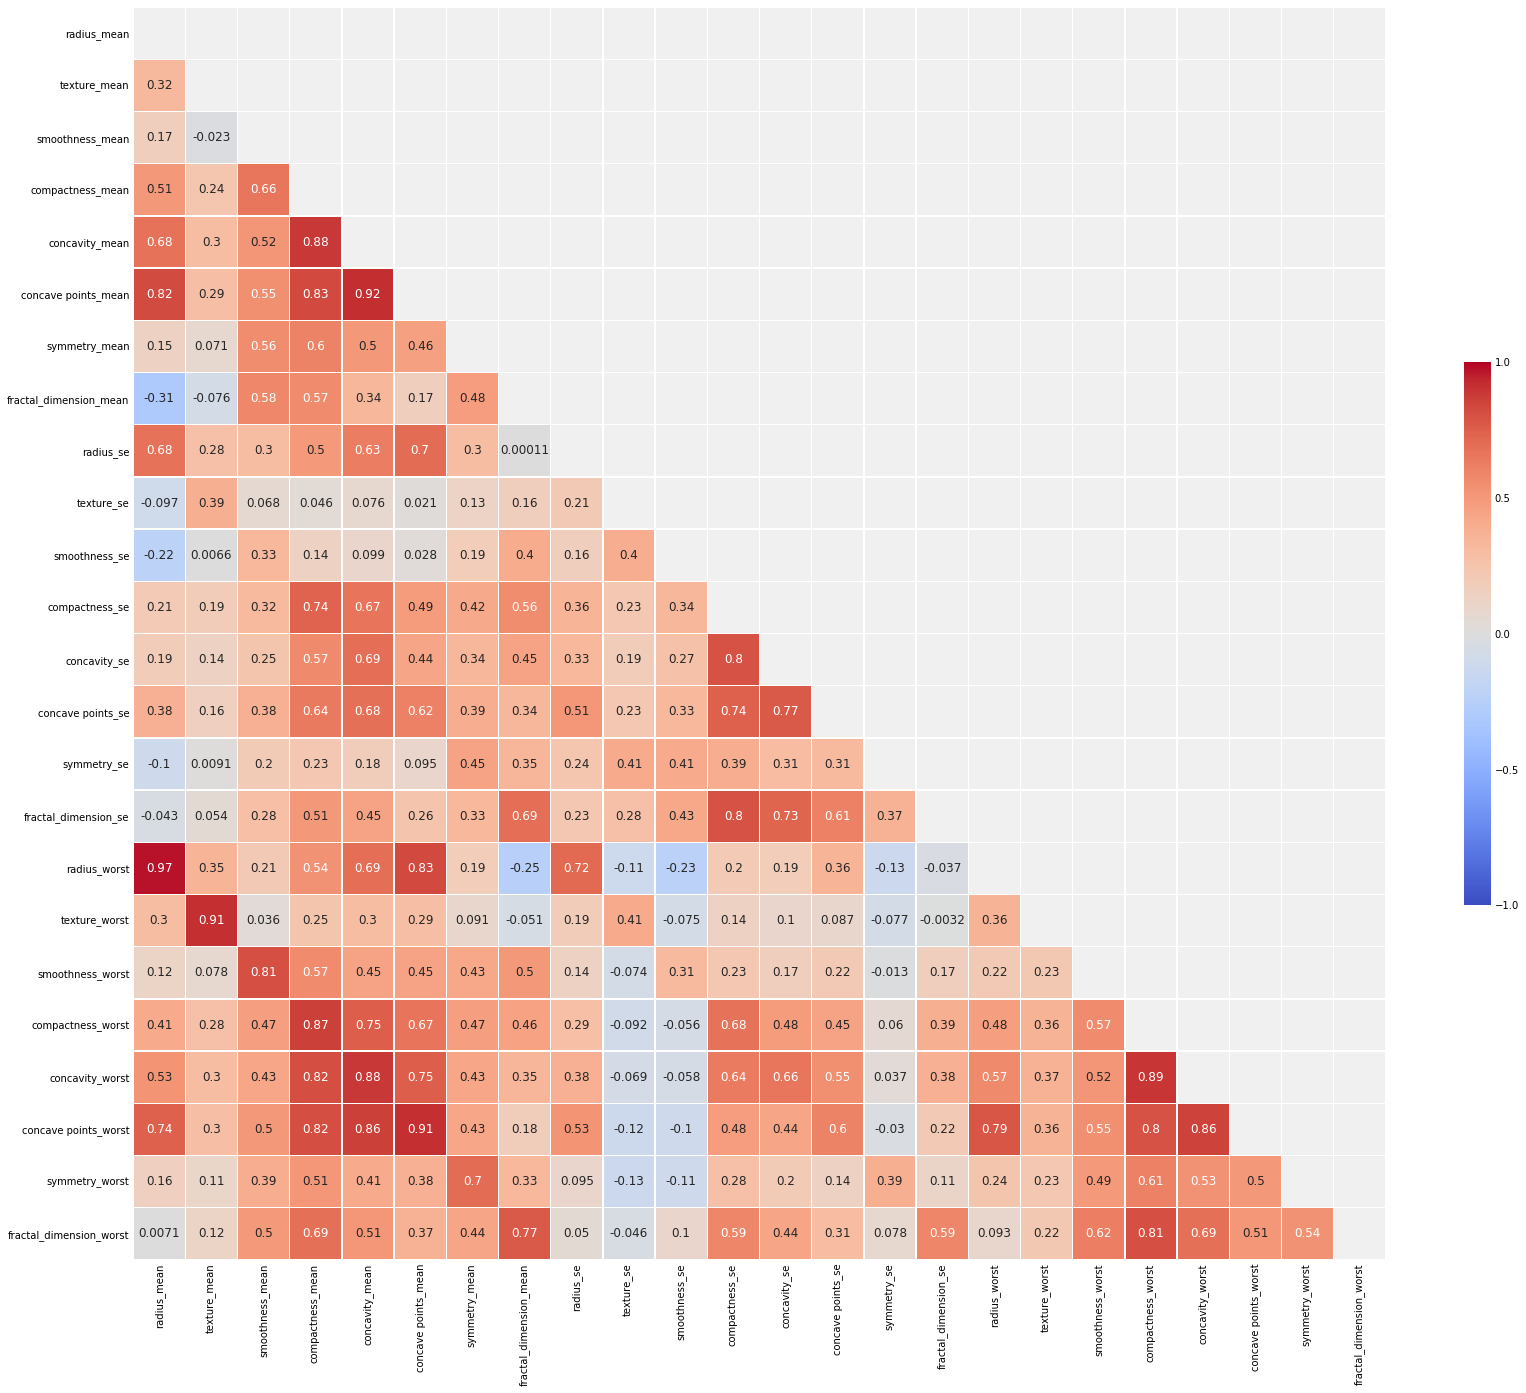

In [14]:
corr_matrix2 = df_drop.corr()

mask = np.zeros_like(corr_matrix2, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(25, 25)) 
heatmap = sns.heatmap(corr_matrix2, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix2.columns, rotation = 0)
ax.set_xticklabels(corr_matrix2.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Target Variable

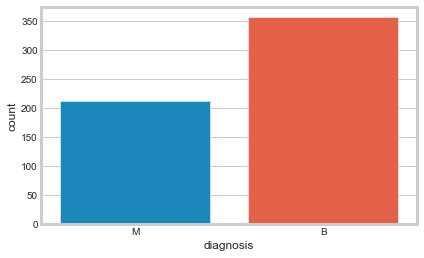

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df_drop)

In [16]:
df_drop['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Data Distribution

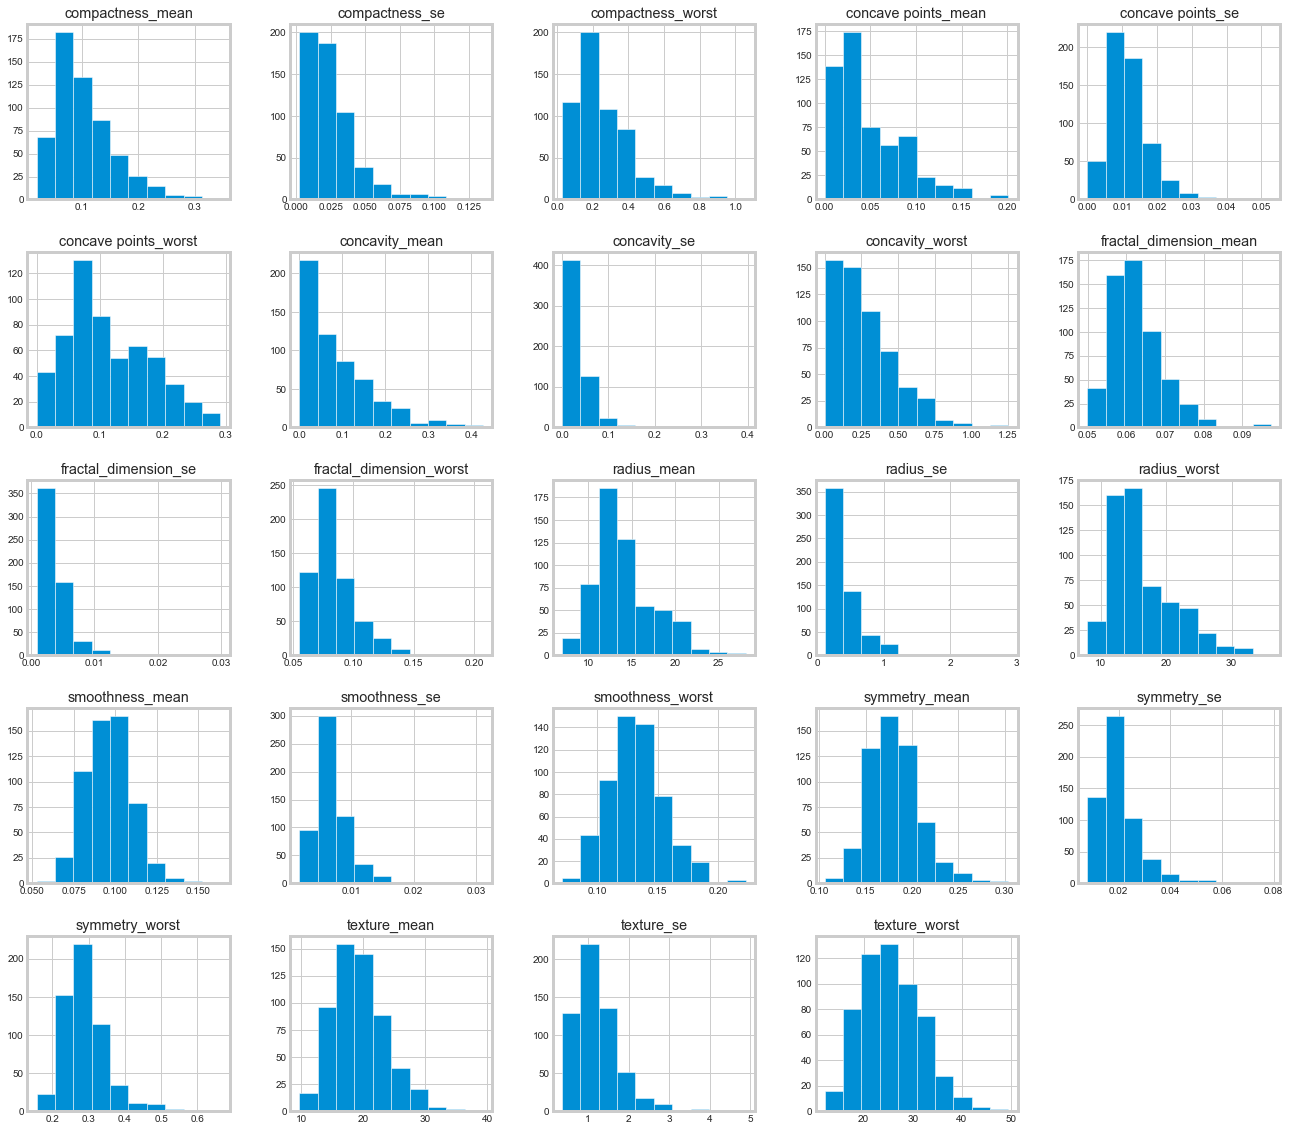

In [17]:
df_drop.hist(figsize=(20,20));

### Log Transformation

In [18]:
df_drop.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X = df_drop.iloc[:, 1:]
y = df_drop.iloc[:, 0]

CATEGORIES = {'B':0,'M':1}
y = y.map(CATEGORIES)

In [20]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
for var in X.columns:
    X[var] = np.log1p(X[var])
    
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.943913,2.431857,0.111899,0.244983,0.262441,0.137237,0.216642,0.075766,0.739554,0.644639,0.006379,0.047875,0.052336,0.015745,0.029588,0.006174,3.272606,2.908539,0.150315,0.510185,0.537604,0.235388,0.378505,0.112346
1,3.071303,2.932260,0.081340,0.075701,0.083330,0.067818,0.166531,0.055122,0.434053,0.550373,0.005211,0.012995,0.018429,0.013311,0.013794,0.003526,3.257712,3.194993,0.116716,0.171092,0.216401,0.170586,0.242946,0.085278
2,3.029650,3.102342,0.104000,0.148334,0.180153,0.120357,0.188055,0.058259,0.557098,0.580482,0.006131,0.039278,0.037604,0.020371,0.022251,0.004561,3.201526,3.278276,0.134880,0.353821,0.371839,0.217528,0.308440,0.083955
3,2.519308,3.062456,0.133219,0.249902,0.216240,0.100026,0.230874,0.092980,0.402527,0.768255,0.009069,0.071930,0.055066,0.018498,0.057920,0.009166,2.766948,3.314186,0.190455,0.623958,0.522893,0.229126,0.509104,0.159565
4,3.058237,2.730464,0.095583,0.124692,0.180653,0.099212,0.166277,0.057165,0.563722,0.577343,0.011424,0.024312,0.055321,0.018675,0.017408,0.005102,3.158701,2.871868,0.128745,0.186480,0.336472,0.150573,0.212204,0.073975


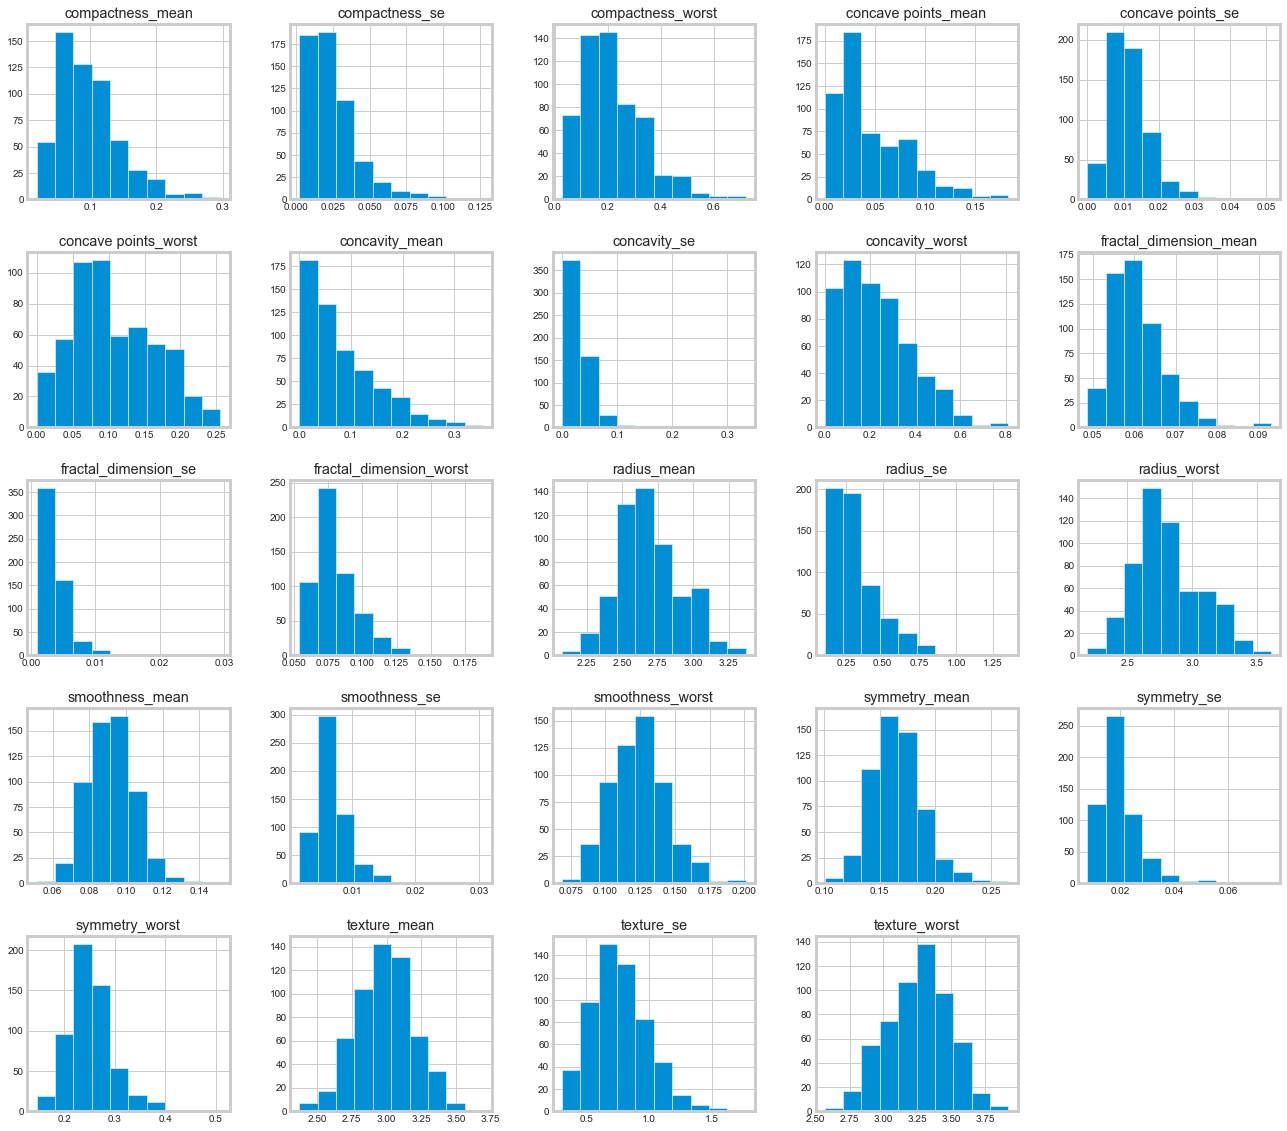

In [22]:
X.hist(figsize=(20,20));

In [23]:
df_drop.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Train Test Split

***Data Split 1: all of our final dataset, without scaling***

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)
(X_train.shape, X_test.shape)

((379, 24), (190, 24))

***Data Split 2: all of our final dataset, with scaling***

In [25]:
X2 = X.copy()
sc = StandardScaler()

X2[X.columns] = sc.fit_transform(X[X.columns])
y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/3,random_state=42, stratify=y)

In [26]:
X2_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
463,-0.709530,-0.119434,-0.802672,-0.884982,-0.705709,-0.813589,-1.089692,-0.596872,-0.950726,-0.885638,-0.109571,-0.474127,-0.379473,-0.698802,0.089214,-0.389295,-0.734831,-0.163351,0.090566,-0.453476,-0.374423,-0.466322,0.532455,-0.290892
542,0.292620,1.366528,-0.970838,-0.611267,-0.604152,-0.476715,0.115838,-0.852926,-0.361808,0.441759,-0.757294,-0.777776,-0.426967,0.148593,-0.221164,-0.443340,0.188745,1.073445,-1.163721,-0.771250,-0.511882,-0.049473,-0.275957,-0.804781
268,-0.277017,-0.682054,-0.144322,-0.811326,-0.632290,-0.857550,0.735239,-0.725560,-0.687204,0.123305,-0.508306,-0.201677,-0.198280,-0.889834,0.660291,-0.621895,-0.431678,-0.229631,-0.288611,-0.453476,-0.302719,-0.868540,1.163650,-0.744499
357,0.036532,-0.682054,-0.633428,-0.958689,-0.965620,-0.729389,-1.438191,-0.562573,-0.591465,0.400852,-0.468110,-0.995782,-0.938523,-0.937012,-0.620660,-0.648552,-0.131562,0.098591,-0.746574,-1.051613,-1.145893,-0.904927,-0.892457,-0.715516
551,-0.880746,0.794546,-0.043582,-0.416030,-0.505900,-0.683742,0.807533,0.390379,-0.469427,0.590976,-1.186669,0.293680,0.104420,-0.250656,1.047232,0.353997,-0.950103,0.514618,-1.042254,-0.472270,-0.538159,-0.766131,0.465694,-0.195618


## Models

### Logistic Regression

In [27]:
lr = LogisticRegression(random_state=42)
score = cross_val_score(lr, X_train, y_train, scoring='roc_auc', n_jobs=-1)
score.mean()

0.9893636673304685

In [28]:
score = cross_val_score(lr, X2_train, y2_train, scoring='roc_auc', n_jobs=-1)
score.mean()

0.9921974897809454

In [29]:
lr.fit(X2_train, y2_train)

LogisticRegression(random_state=42)

In [30]:
lr_predict_proba = lr.predict_proba(X2_test)
lr_predict = lr.predict(X2_test)

In [31]:
lr_predict_proba[10:20][:,1]

array([5.97757868e-02, 2.44468430e-04, 9.99977791e-01, 1.86004485e-02,
       1.17186740e-02, 4.01935365e-04, 7.52381059e-03, 5.14921284e-01,
       5.26867450e-05, 2.30749329e-04])

In [32]:
y2_test[10:20]

73     1
320    0
25     1
519    0
123    0
386    0
497    0
99     1
60     0
206    0
Name: diagnosis, dtype: int64

In [33]:
conf_matrix = confusion_matrix(y2_test, lr_predict)
conf_matrix

array([[119,   0],
       [  5,  66]], dtype=int64)

In [34]:
print(classification_report(y2_test, lr_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       119
           1       1.00      0.93      0.96        71

    accuracy                           0.97       190
   macro avg       0.98      0.96      0.97       190
weighted avg       0.97      0.97      0.97       190



In [35]:
total=sum(sum(conf_matrix))

sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9596774193548387
Specificity :  1.0


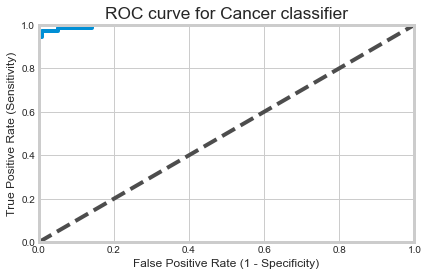

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, lr_predict_proba[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [37]:
auc(fpr, tpr)

0.9970410699491065

## RandomForestClassifier

In [38]:
model = RandomForestClassifier(max_depth=8, max_features='sqrt', 
                               min_samples_leaf=2, n_estimators=900)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=900)

In [39]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'bening'
y_train_str[y_train_str == '1'] = 'malignant'
y_train_str = y_train_str.values

In [40]:
PATH_TO_GRAPHVIZ = 'C:/Users/rkbra/AppData/Local/Continuum/anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

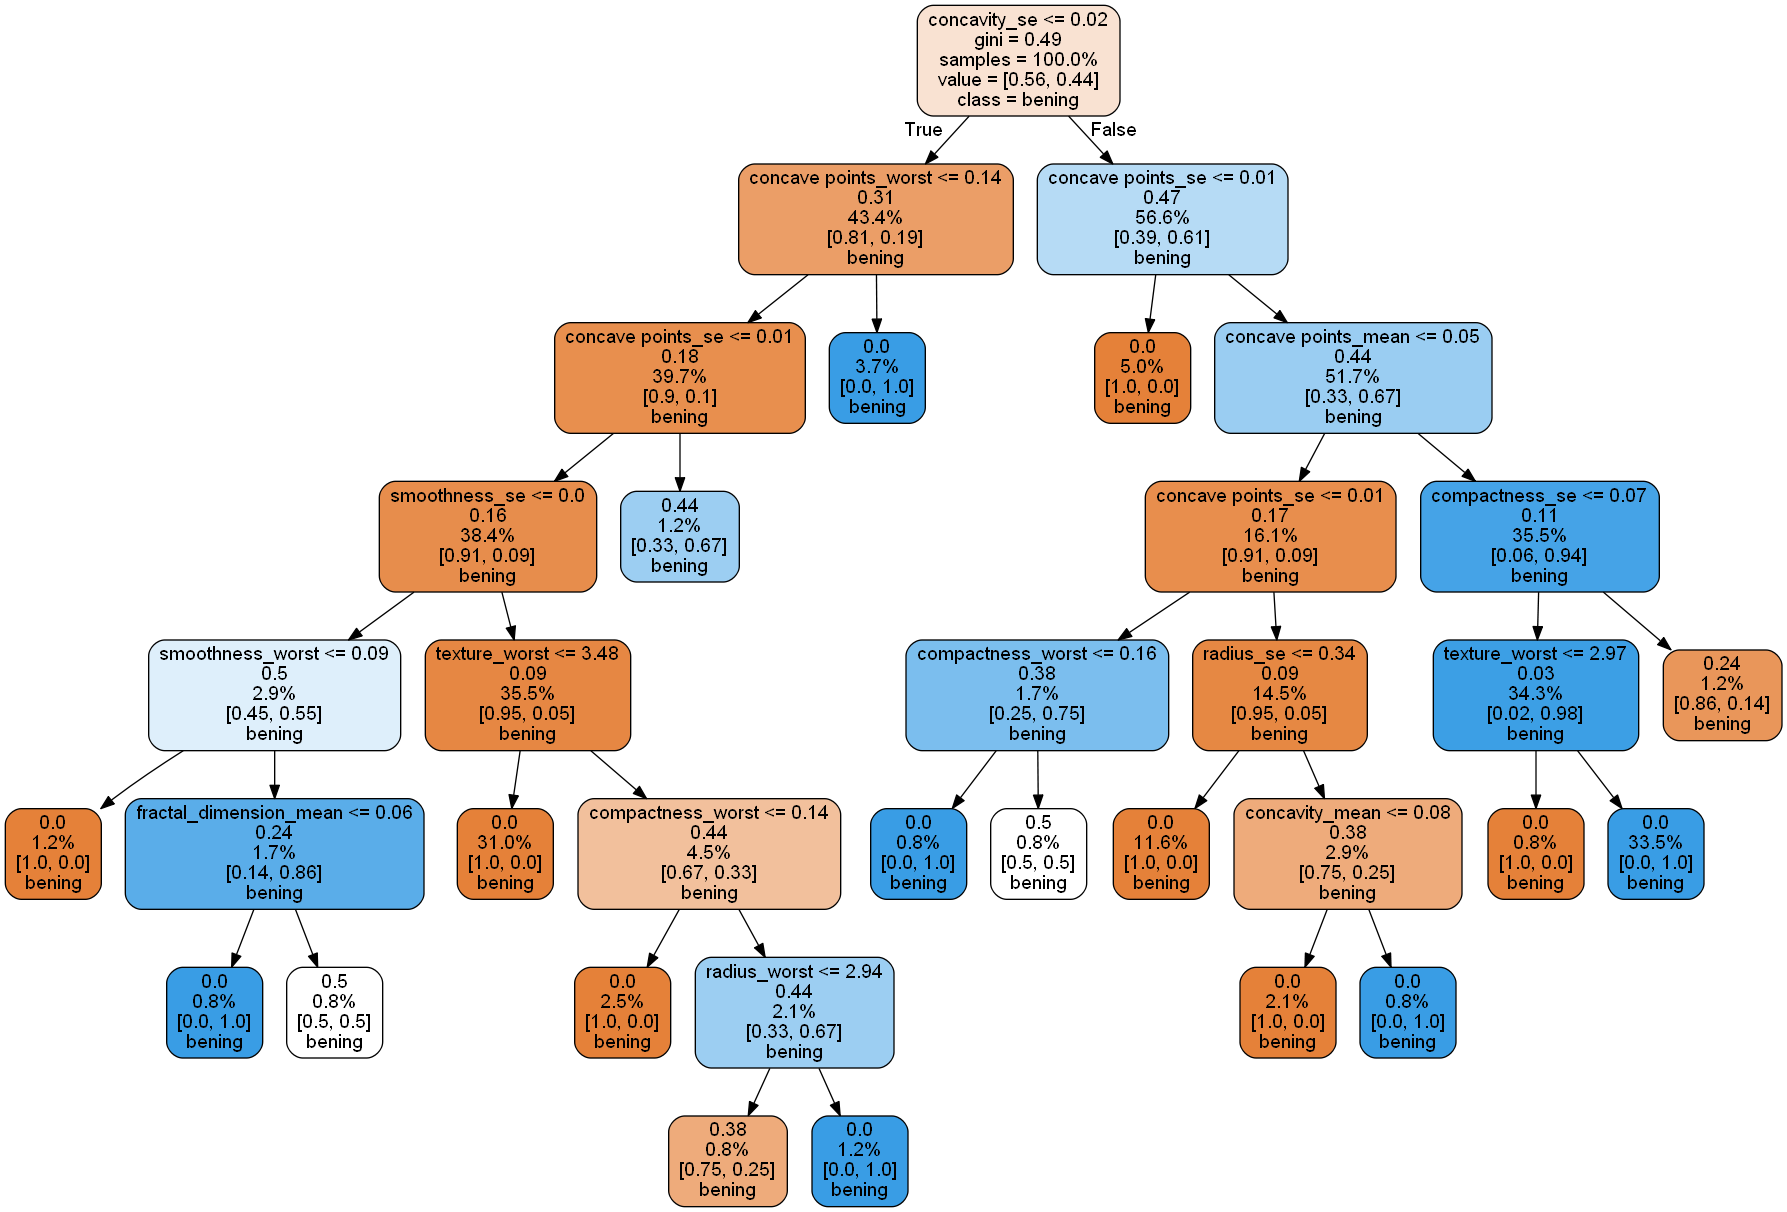

In [41]:
#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
os.environ["PATH"] += os.pathsep + PATH_TO_GRAPHVIZ

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)


call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'], shell=True)


(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


Image(filename = 'tree.png')

## Pickle the Model

In [42]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

y = df_drop.diagnosis
y = y.map(CATEGORIES)
X = df_drop.drop('diagnosis',1)
model = pipeline.fit(X,y)

In [43]:
import joblib

joblib.dump(model, './models/cancer.pickle')

['./models/cancer.pickle']

In [44]:
model = joblib.load('./models/cancer.pickle')

In [45]:
pred_proba = model.predict_proba(np.array(X.iloc[0]).reshape(1, -1))

In [46]:
pred_proba

array([[1.1954558e-07, 9.9999988e-01]])

In [47]:
y[0]

1